# Notes

- Used log transformation to allow for better visualization as well as prepare the data for the algorithms
- Performed various feature selection techniques, went with anova for the best results
- Developed and evaluated various models, with added Reciever Operating Curve 
- Final model with best performance turned out to be an ensamble

<b> Comments <b>
- Ran an overly complicated pipeline of functions to train and evaluate on sklearn, a lot simpler method is applied on other notebooks (this pipeline was utilized during classes)


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
predict_students_dropout_and_academic_success = fetch_ucirepo(id=697) 
  
# data (as pandas dataframes) 
X = predict_students_dropout_and_academic_success.data.features 
y = predict_students_dropout_and_academic_success.data.targets 


In [4]:
predict_students_dropout_and_academic_success.variables

,name,role,type,demographic,description,units,missing_values
0,Marital Status,Feature,Integer,Marital Status,1 – single 2 – married 3 – widower 4 – divorce...,None,no
1,Application mode,Feature,Integer,None,1 - 1st phase - general contingent 2 - Ordinan...,None,no
2,Application order,Feature,Integer,None,Application order (between 0 - first choice; a...,None,no
3,Course,Feature,Integer,None,33 - Biofuel Production Technologies 171 - Ani...,None,no
4,Daytime/evening attendance,Feature,Integer,None,1 – daytime 0 - evening,None,no
5,Previous qualification,Feature,Integer,Education Level,1 - Secondary education 2 - Higher education -...,None,no
6,Previous qualification (grade),Feature,Continuous,None,Grade of previous qualification (between 0 and...,None,no
7,Nacionality,Feature,Integer,Nationality,1 - Portuguese; 2 - German; 6 - Spanish; 11 - ...,None,no
8,Mother's qualification,Feature,Integer,Education Level,1 - Secondary Education - 12th Year of Schooli...,None,no
9,Father's qualification,Feature,Integer,Education Level,1 - Secondary Education - 12th Year of Schooli...,None,no


In [5]:
predict_students_dropout_and_academic_success.metadata

{'uci_id': 697,
 'name': "Predict Students' Dropout and Academic Success",
 'repository_url': 'https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success',
 'data_url': 'https://archive.ics.uci.edu/static/public/697/data.csv',
 'abstract': "A dataset created from a higher education institution (acquired from several disjoint databases) related to students enrolled in different undergraduate degrees, such as agronomy, design, education, nursing, journalism, management, social service, and technologies.\nThe dataset includes information known at the time of student enrollment (academic path, demographics, and social-economic factors) and the students' academic performance at the end of the first and second semesters. \nThe data is used to build classification models to predict students' dropout and academic sucess. The problem is formulated as a three category classification task, in which there is a strong imbalance towards one of the classes.",
 'area': 'Soci

In [6]:
data = pd.concat((X,y), axis=1)

In [7]:
data

,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [8]:
data["Target"].value_counts()

Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital Status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [10]:
data["Target"].value_counts()

Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

# EDA

## Curricular Units

In [13]:
X_curricular = X.filter(like='Curricular', axis=1).copy() 

In [14]:
X_curricular.loc[:,"Target"] = data["Target"]

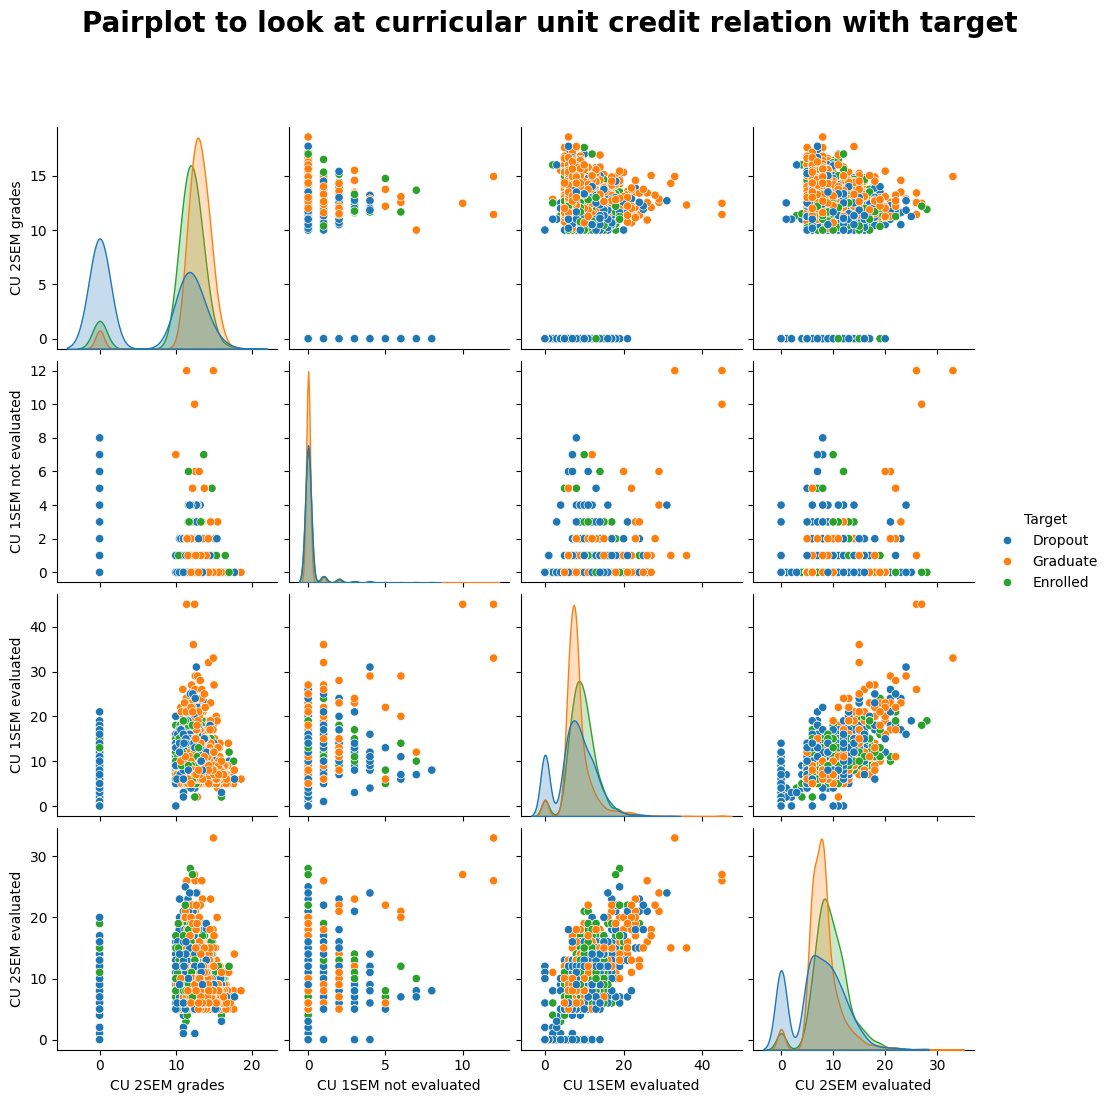

In [15]:
g = sns.pairplot(X_curricular[["Curricular units 2nd sem (grade)",
                                   "Curricular units 1st sem (without evaluations)",
                                   "Curricular units 1st sem (evaluations)",
                                   "Curricular units 2nd sem (evaluations)",
                                   "Target"]], hue="Target",corner=False, diag_kws=dict(common_norm = False))

new_labels={"Curricular units 2nd sem (grade)": "CU 2SEM grades",
                                   "Curricular units 1st sem (without evaluations)" : "CU 1SEM not evaluated",
                                   "Curricular units 1st sem (evaluations)":"CU 1SEM evaluated",
                                   "Curricular units 2nd sem (evaluations)": "CU 2SEM evaluated"}

for ax in g.axes.flat: #para cada axes 
    if ax is not None:  
        xlabel = ax.get_xlabel()
        ylabel = ax.get_ylabel()
        if xlabel in new_labels:               #look at y and x of each axes
            ax.set_xlabel(new_labels[xlabel])
        if ylabel in new_labels:
            ax.set_ylabel(new_labels[ylabel])

g.fig.suptitle('Pairplot to look at curricular unit credit relation with target', y=1.1, fontweight = "bold", fontsize=20)

plt.show()

Would seem to be reasonable that for the dropout class, most curricular units have higher density of lower values

In [17]:
#Dropping binary columns for plotting

data_copy = data.copy()  
columns_to_drop = []  

for i in data.columns:
    if len(data[i].value_counts()) <= 2:
        columns_to_drop.append(i)  

data_filtered_numeric = data_copy.drop(columns=columns_to_drop, axis=1)

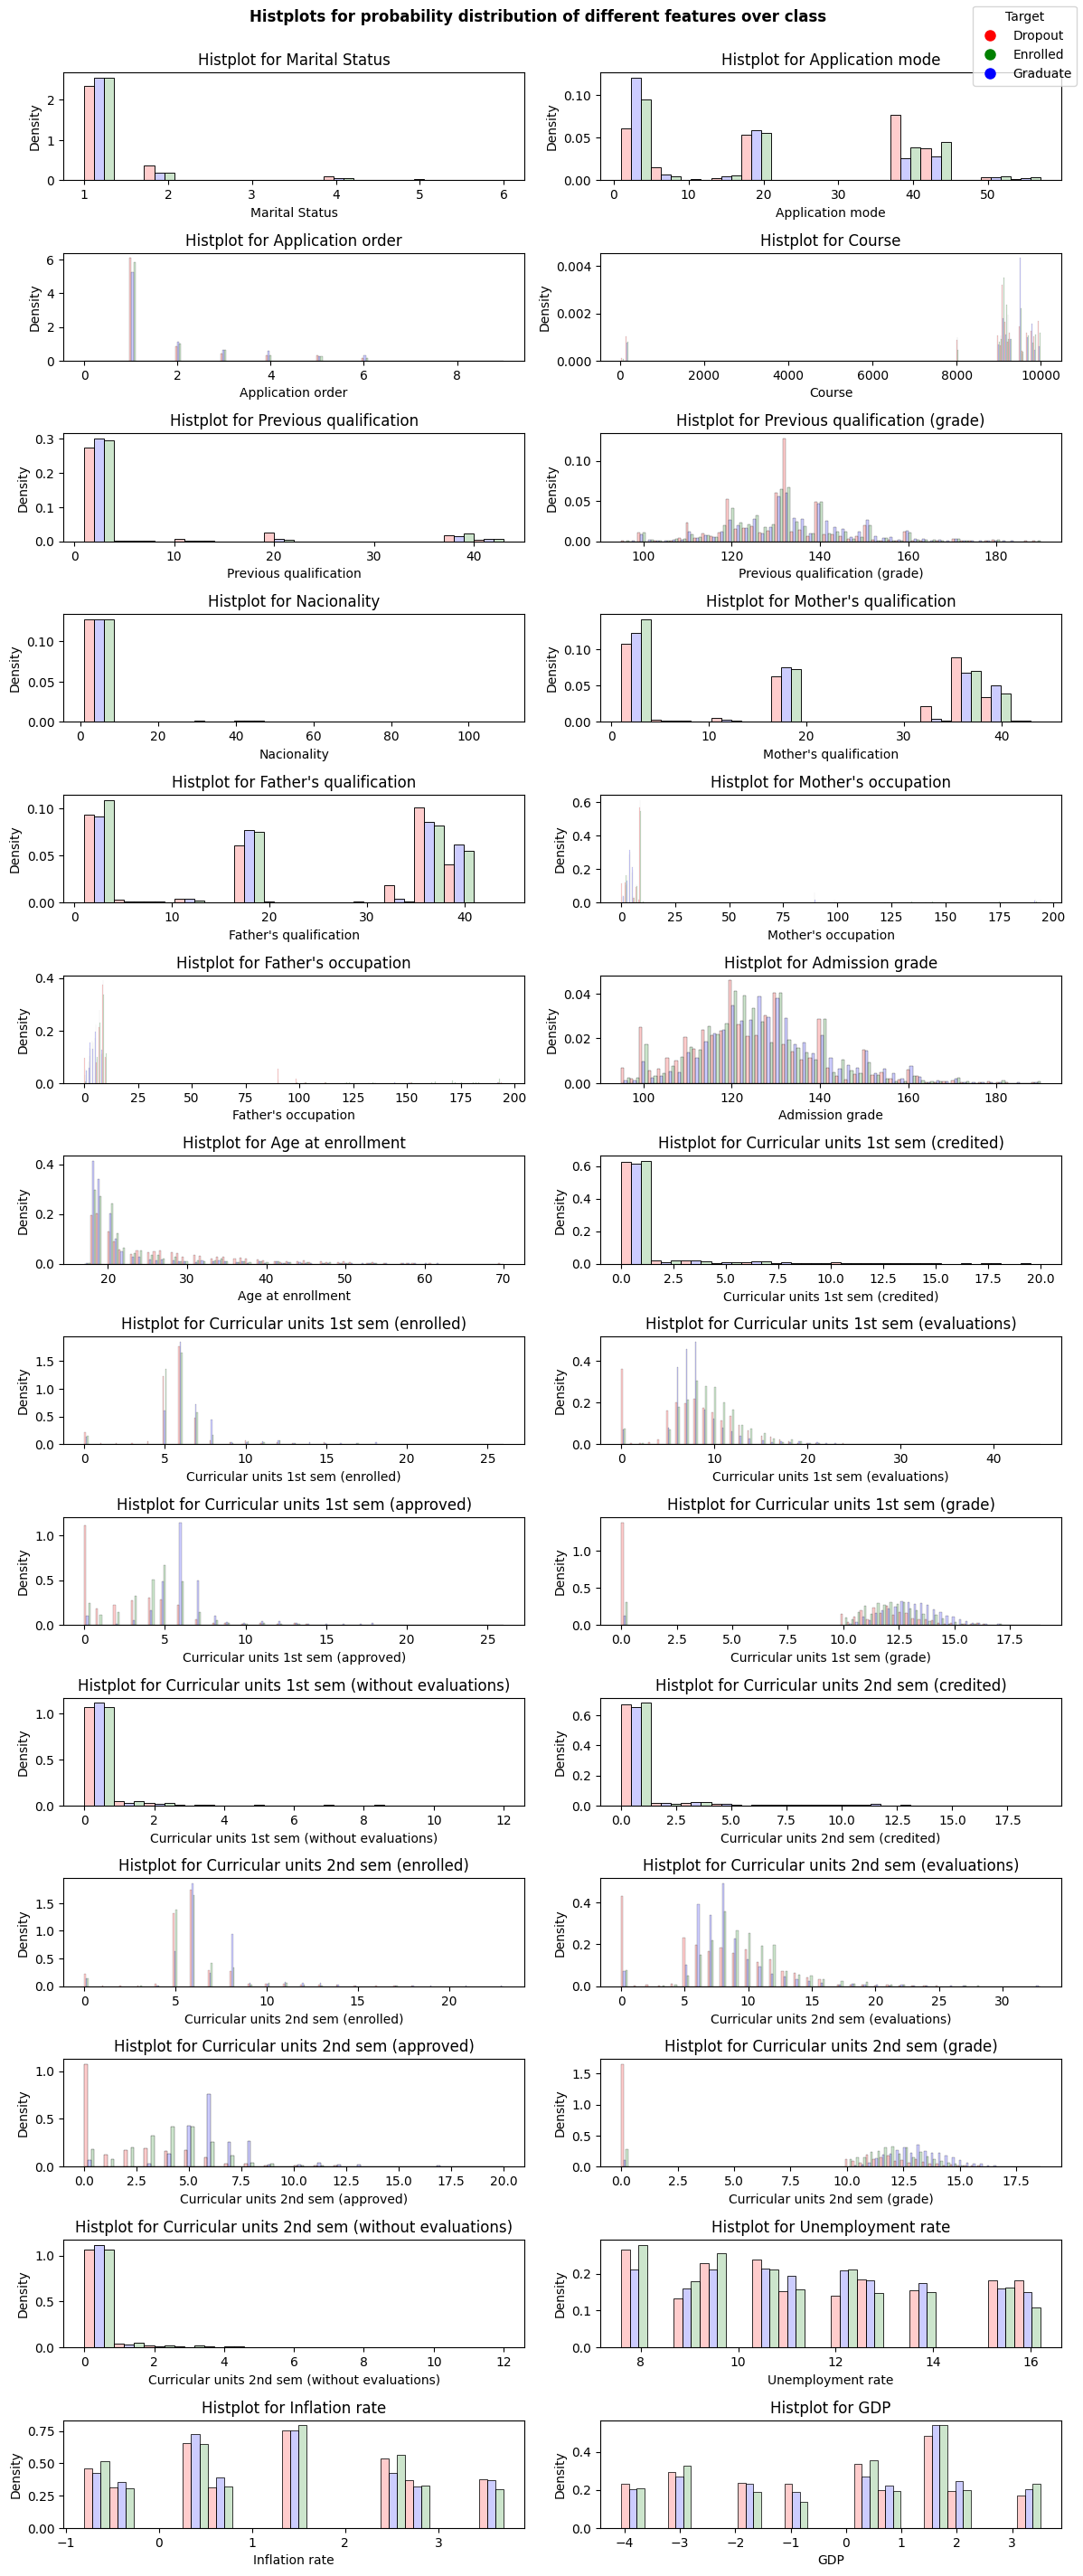

In [18]:
fig, axes = plt.subplots(18, 2, figsize=(12, 36), tight_layout=True)  
axes = axes.flatten()  
numeric_cols = data_filtered_numeric.select_dtypes(include="number").columns

target_mapping = {"Dropout": "red", "Enrolled": "green", "Graduate": "blue"}
hue_colors = list(target_mapping.values())
hue_labels = list(target_mapping.keys())

for i, ax in zip(numeric_cols, axes):
    sns.histplot(x=data[i], ax=ax, hue = data["Target"], stat="density",common_norm=False ,palette = target_mapping ,legend=False, multiple="dodge", alpha=0.2)  
    ax.set_title(f"Histplot for {i}")  

handles = [plt.Line2D([0], [0], marker='o', color=color, linestyle='', markersize=8) 
           for color in hue_colors]
fig.legend(handles, hue_labels, loc='upper right', title="Target", fontsize=10)

[fig.delaxes(ax) for ax in axes.flatten() if not ax.has_data()]

plt.suptitle("Histplots for probability distribution of different features over class", y=1, fontweight = "bold")
plt.tight_layout()
plt.show()

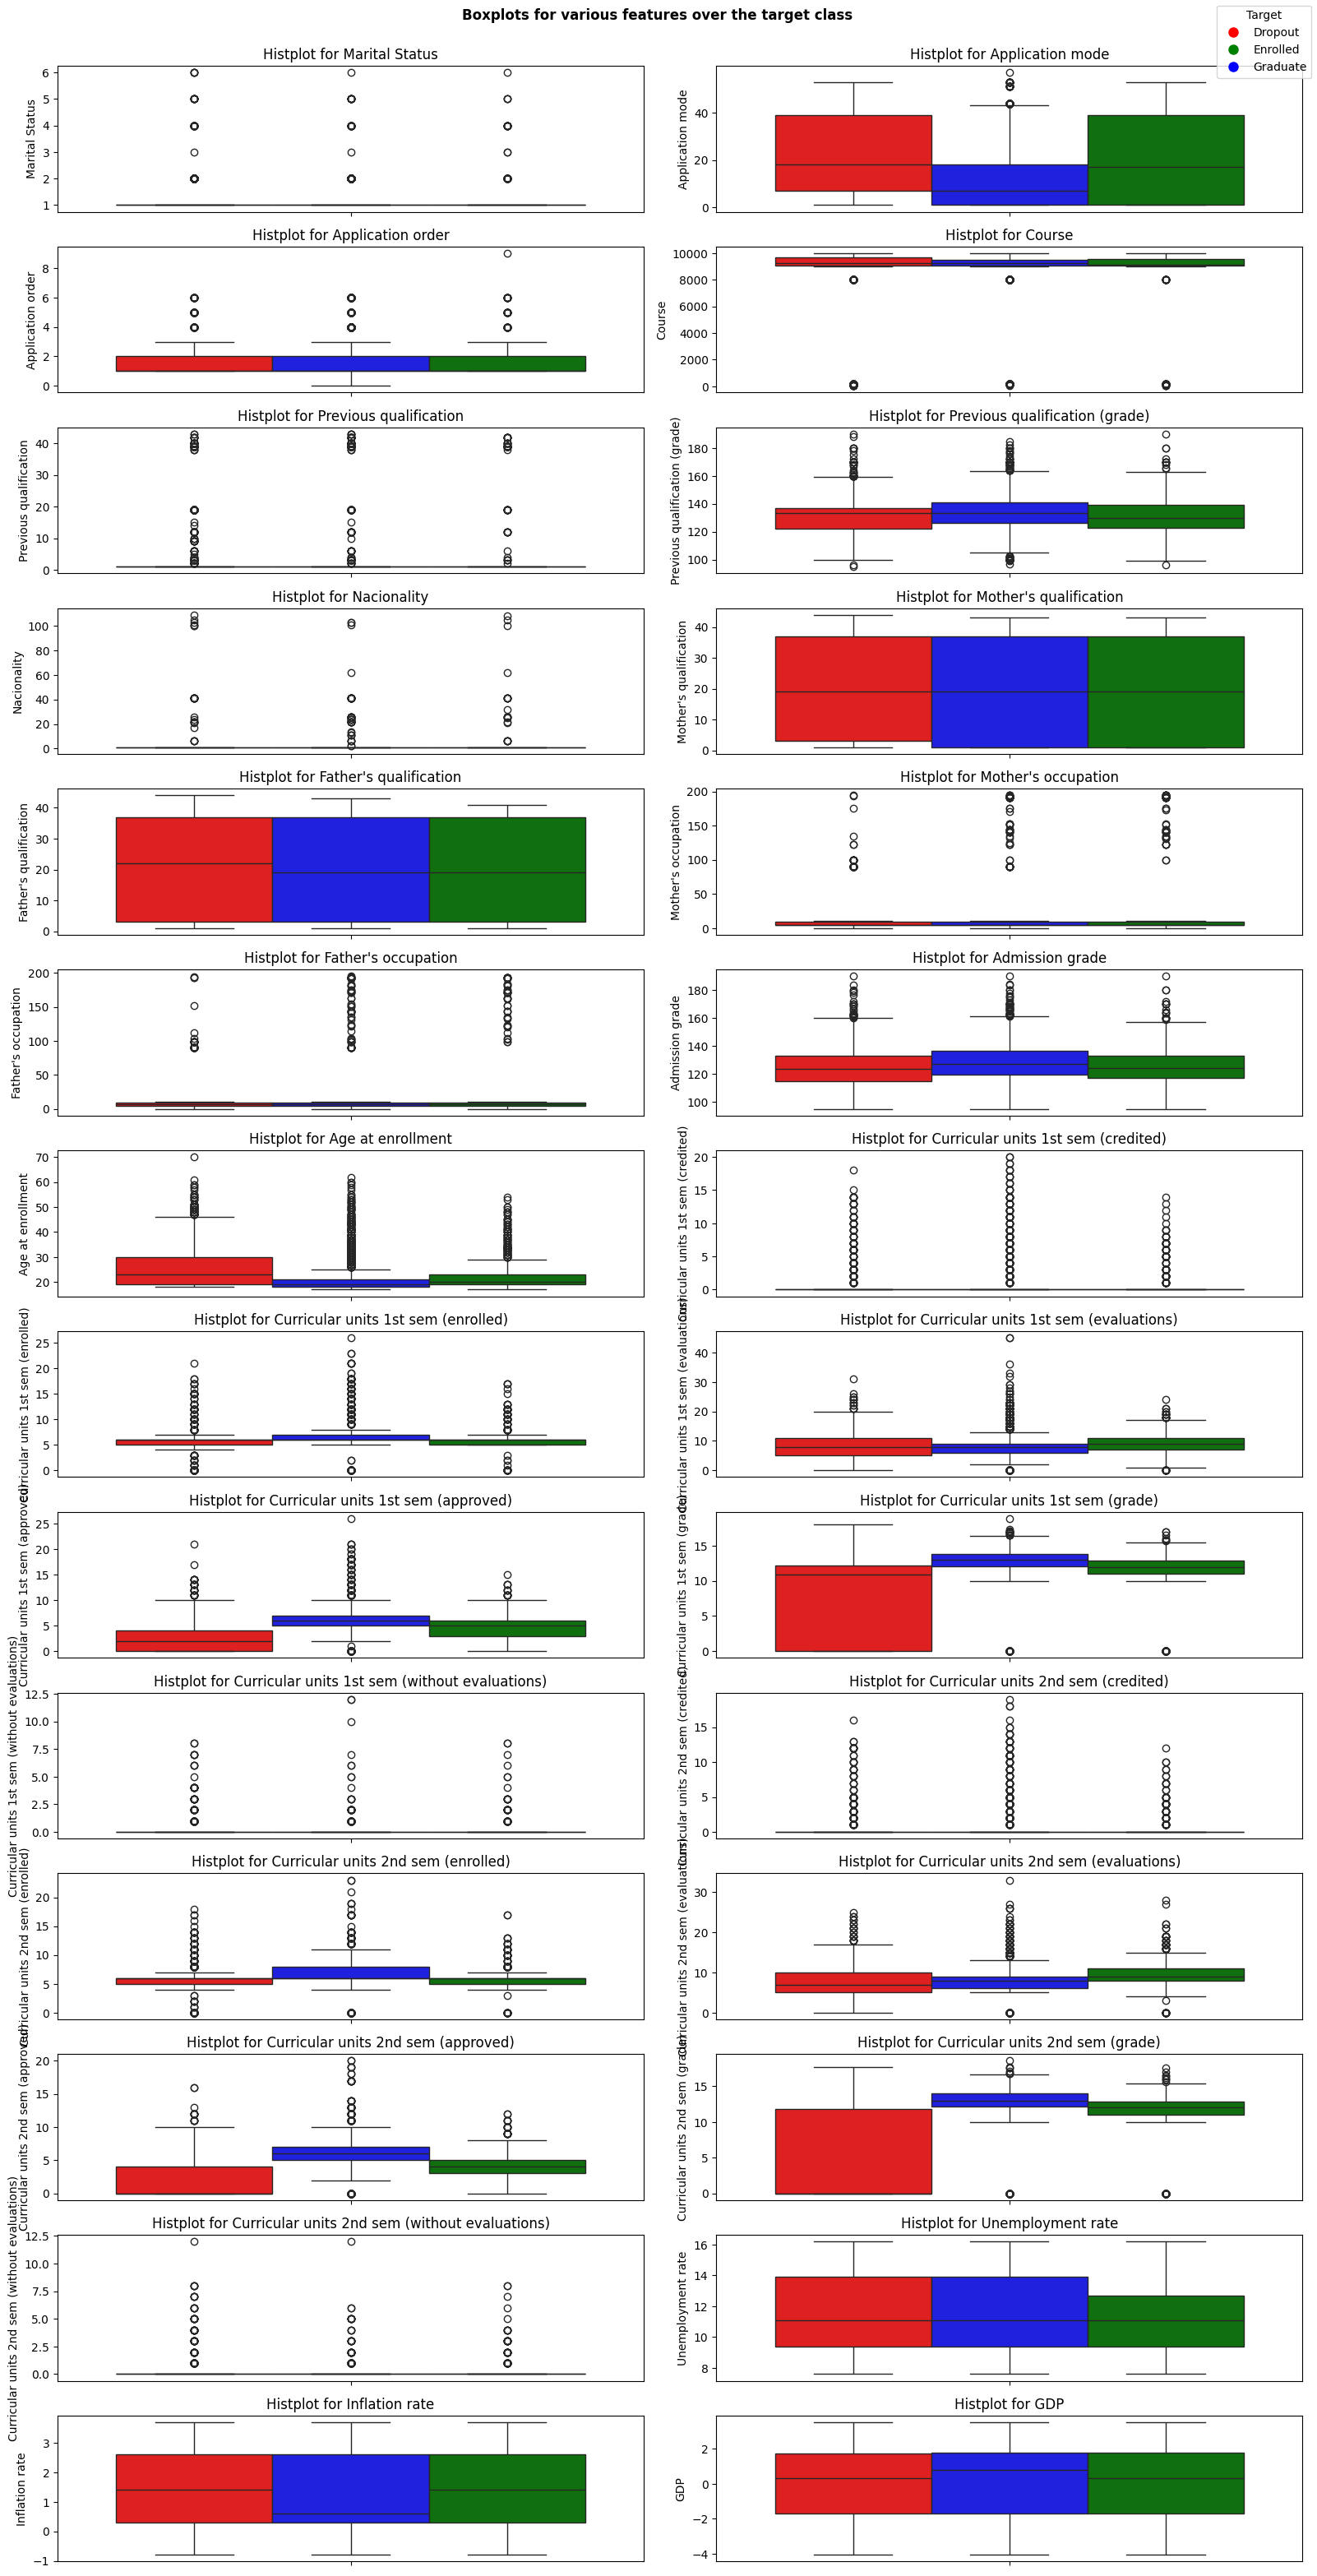

In [19]:
fig, axes = plt.subplots(18, 2, figsize=(16, 40), tight_layout=True)  
axes = axes.flatten()  
numeric_cols = data_filtered_numeric.select_dtypes(include="number").columns

target_mapping = {"Dropout": "red", "Enrolled": "green", "Graduate": "blue"}
hue_colors = list(target_mapping.values())
hue_labels = list(target_mapping.keys())

for i, ax in zip(numeric_cols, axes):
    sns.boxplot(y=data[i], ax=ax, hue = data["Target"] ,palette = target_mapping ,legend=False)
    
    ax.set_title(f"Histplot for {i}")  

handles = [plt.Line2D([0], [0], marker='o', color=color, linestyle='', markersize=8) 
           for color in hue_colors]
fig.legend(handles, hue_labels, loc='upper right', title="Target", fontsize=10)

[fig.delaxes(ax) for ax in axes.flatten() if not ax.has_data()]

plt.suptitle("Boxplots for various features over the target class", y = 1,fontweight = "bold")
plt.tight_layout()
plt.show()

Application mode and the features relating to curricular units seem to be more separable over the class target

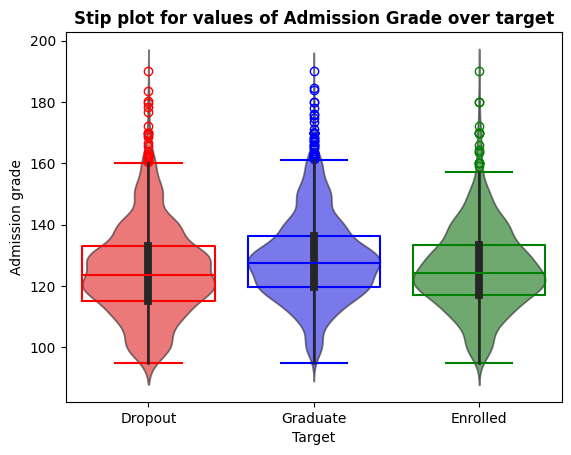

In [21]:
#sns.stripplot(data=data, y = "Admission grade",x= "Target", hue = "Target", palette = "dark:black",linewidth=0.01,size=1.5)

sns.boxplot(data = data, y = "Admission grade", x = "Target", hue = "Target", palette = target_mapping, fill=False)
sns.violinplot(data = data, y = "Admission grade", x = "Target", hue = "Target", palette = target_mapping, alpha=0.6)

plt.title("Stip plot for values of Admission Grade over target", fontweight = "bold")
plt.show()

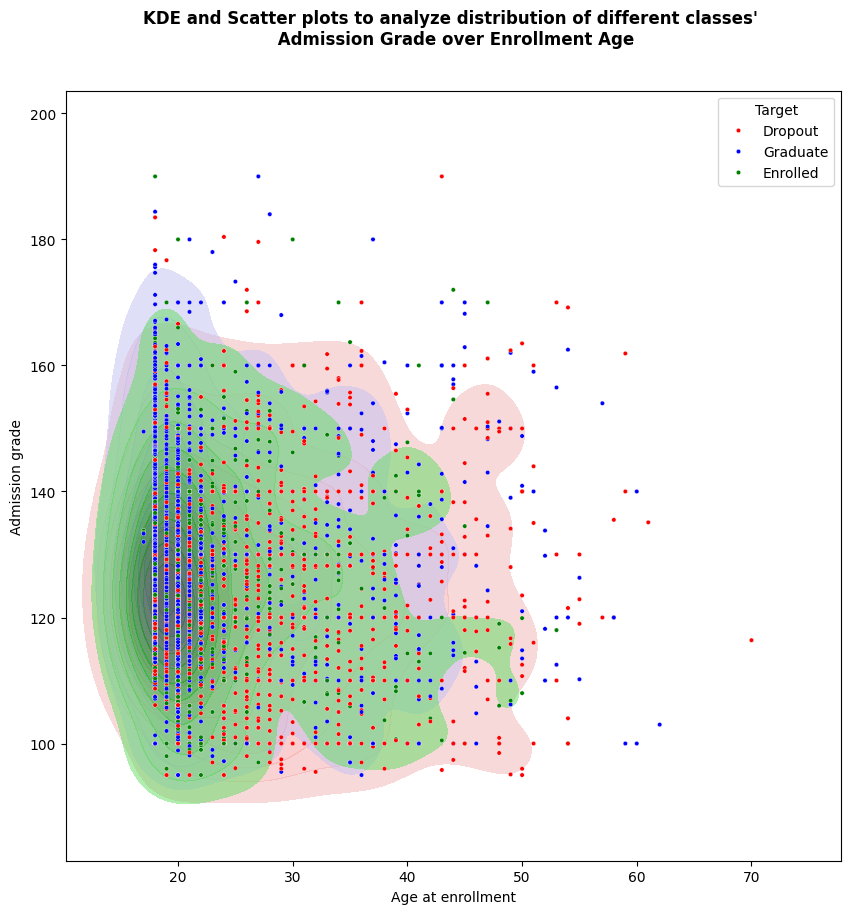

In [22]:
plt.figure(figsize=(10,10))
sns.kdeplot(data=data, y= "Admission grade", x= "Age at enrollment", hue = "Target", palette = target_mapping,common_norm=False, fill=True,alpha=0.5)
sns.scatterplot(data=data, y= "Admission grade", x= "Age at enrollment", hue = "Target", s=10, palette = target_mapping)


plt.title("KDE and Scatter plots to analyze distribution of different classes' \n Admission Grade over Enrollment Age",y=1.05, fontweight = "bold")

plt.show()

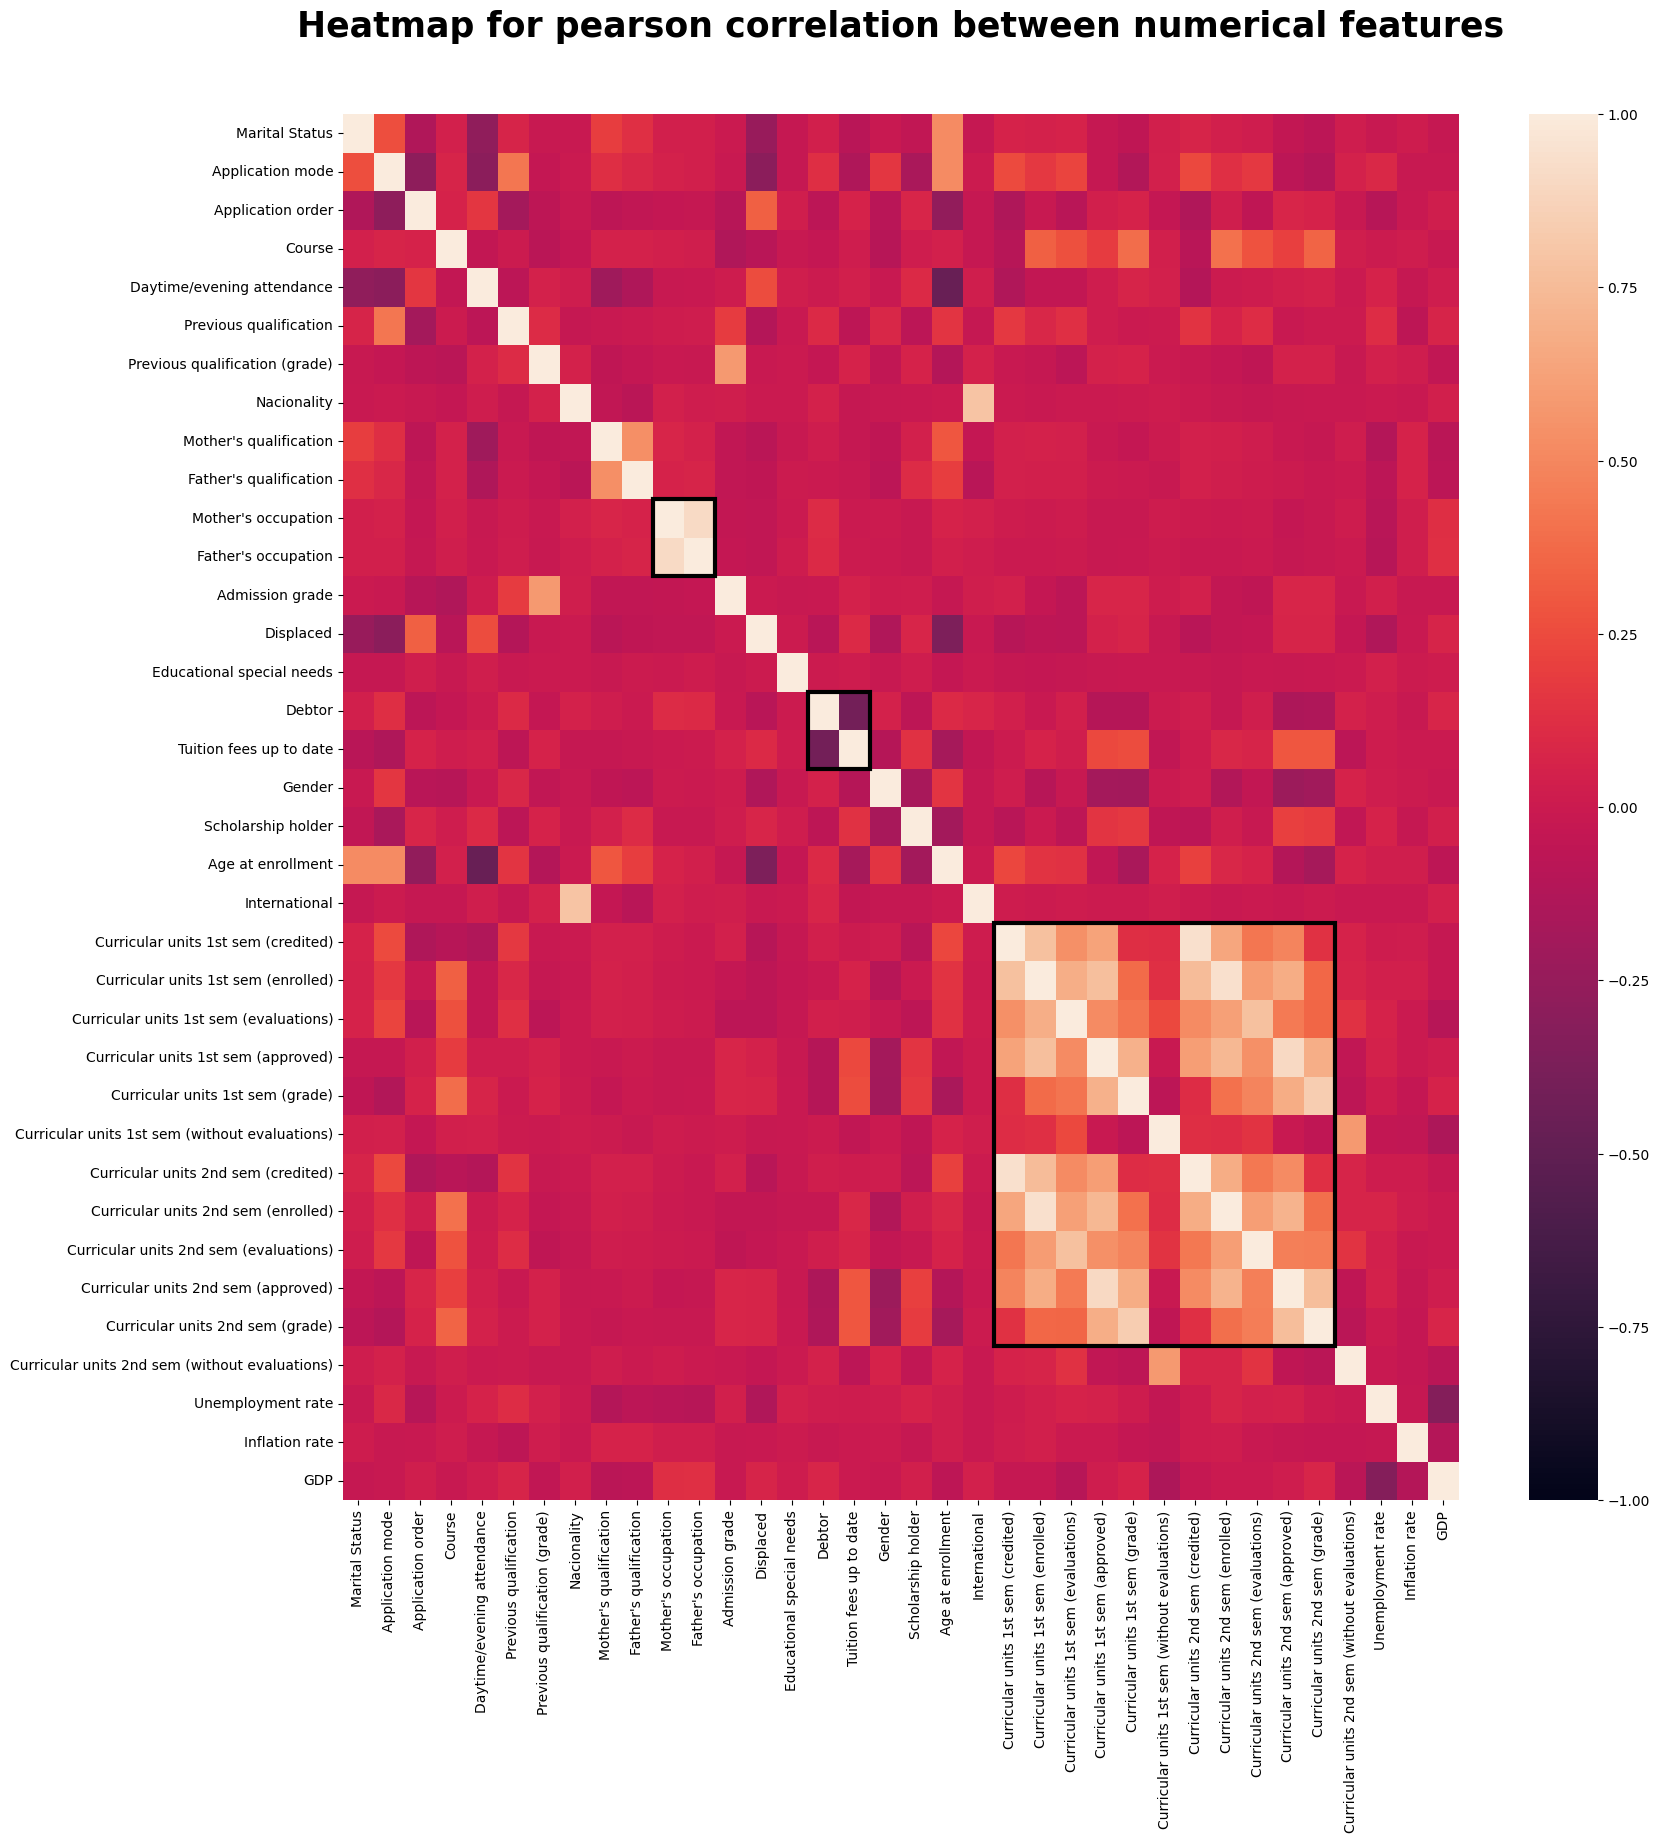

In [23]:
plt.figure(figsize=(18,18))
g = sns.heatmap(data= data.corr(numeric_only=True),vmin=-1, vmax=1, annot=False, cbar=True)
from matplotlib.patches import Rectangle,Circle


rect = Rectangle((21, 21), 11, 11,linewidth=3, edgecolor='black', facecolor='none')
rect2 = Rectangle((15,15),2,2, linewidth=3,edgecolor="black", facecolor="none")
rect3 = Rectangle((10,10),2,2, linewidth=3,edgecolor="black", facecolor="none")

g.add_patch(rect)
g.add_patch(rect2)
g.add_patch(rect3)

plt.title("Heatmap for pearson correlation between numerical features", fontweight="bold", fontsize=25,y=1.05)

plt.show()

Points to the high correlation between curricular unit features, as well as tuition fees and debtor, father and mother occupation

# Preprocessing and feature selection

In [26]:
import sklearn

In [27]:
skewness = pd.DataFrame(X.skew())

In [28]:
skewness.reset_index(inplace = True)

In [29]:
skewness.rename({"index": "col_names", 0:"skewness"}, axis='columns', inplace = True)

In [30]:
def apply_log1p_selectively(X, skewness):
    for col, skew in zip(skewness.T.loc['col_names'], skewness.T.loc['skewness']):
        if abs(skew) > 2:  
            X.loc[:,col] = np.log1p(X[col])  
    return X
            

In [31]:
X = apply_log1p_selectively(X,skewness)

C:\Users\TESTER\AppData\Local\Temp\ipykernel_49828\4221895019.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.69314718 0.69314718 0.69314718 ... 0.69314718 0.69314718 0.69314718]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X.loc[:,col] = np.log1p(X[col])
C:\Users\TESTER\AppData\Local\Temp\ipykernel_49828\4221895019.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[5.14749448 9.13291923 9.11283779 ... 9.15915234 9.12129056 9.18748108]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X.loc[:,col] = np.log1p(X[col])
C:\Users\TESTER\AppData\Local\Temp\ipykernel_49828\4221895019.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.69314718 0.69314718 0.69314718 ... 0.69314718 0.693

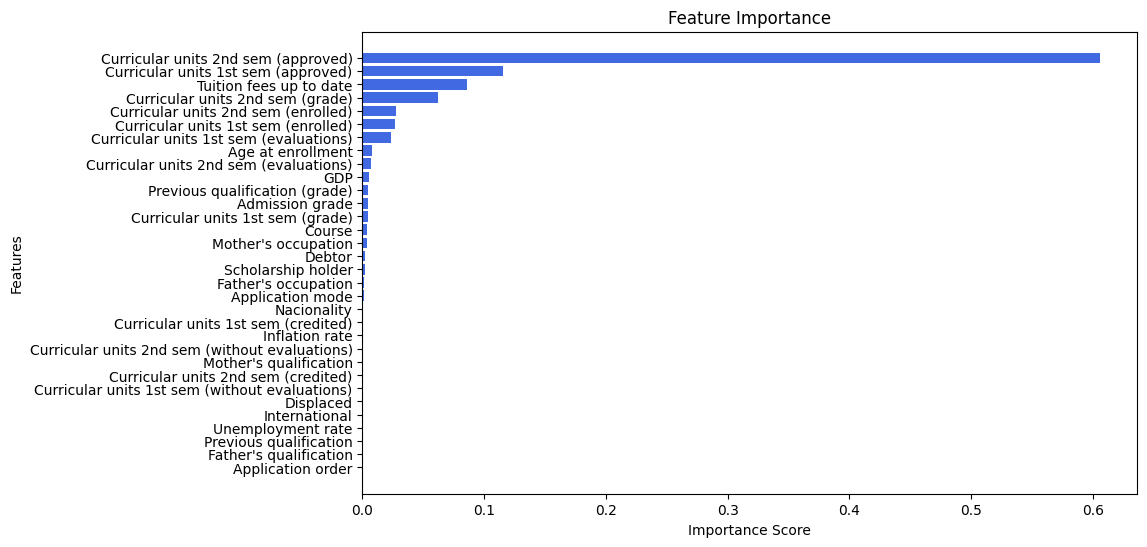

In [32]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=200, criterion='gini', max_depth=4, 
                              min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
                              max_features=0.8, max_leaf_nodes=None, min_impurity_decrease=0.0, 
                              bootstrap=True, oob_score=True, n_jobs=None, random_state=42, verbose=0, 
                              warm_start=False, ccp_alpha=0.0, max_samples=0.8, monotonic_cst=None)

model.fit(X, y.values.ravel())

feature_importances = pd.Series(model.feature_importances_, index=X.columns)

feature_importances = feature_importances[(feature_importances > 0.0001)]
feature_importances = feature_importances.sort_values(ascending=True)

important_features = feature_importances.index


plt.figure(figsize=(10, 6))
plt.barh(y=feature_importances.index, width=feature_importances.values, color='royalblue') 
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


In [33]:
def filter_cols_on_str(X,word: str):
    tmp = X.copy()
    for column in X.columns:
        if word in column:
            tmp = tmp.drop(columns=column)
        else:
            pass
    return tmp

X_filtered_off_of_cu = filter_cols_on_str(X,word = "wowow") #used random string for no filtering

In [34]:
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest  #Orders f statistics and selects the Kbest ones

anova_dict = f_classif(X, y.values.squeeze())

anova_list = []
for element in zip(X, anova_dict[0], anova_dict[1]):
    case = {'column_names': element[0], 'f_value': element[1], 'p_value':element[2] }
    anova_list.append(case) #appends each row of 
    
anova_result = pd.DataFrame.from_dict(anova_list, orient = "columns")
anova_result.sort_values(by = "f_value", ascending = False)

,column_names,f_value,p_value
30,Curricular units 2nd sem (approved),1410.732938,0.000000e+00
31,Curricular units 2nd sem (grade),1134.109544,0.000000e+00
24,Curricular units 1st sem (approved),859.866768,3.649472e-316
25,Curricular units 1st sem (grade),713.517328,2.803052e-269
16,Tuition fees up to date,505.621429,1.784950e-198
18,Scholarship holder,225.751437,4.436825e-94
19,Age at enrollment,185.876446,3.089385e-78
15,Debtor,137.647527,1.018223e-58
17,Gender,123.041811,9.950346e-53
1,Application mode,114.534956,3.190893e-49


In [35]:
from sklearn.feature_selection import f_classif #computes ANOVA 
from sklearn.feature_selection import SelectKBest  #Orders f statistics and selects the Kbest ones





anova = SelectKBest(f_classif, k=20) #we choose to keep the 12 best ones, try different numbers


X_anova = anova.fit_transform(X_filtered_off_of_cu, y.values.squeeze())

anova_results = pd.DataFrame({'Feature': X_filtered_off_of_cu.columns, 
                              'F-value': anova.scores_,
                              'p-value': anova.pvalues_})

anova_results.sort_values(by='F-value', ascending=False, inplace=True)

selected_features = pd.Series(anova.get_support(), index = X_filtered_off_of_cu.columns)

selected_features,  anova_results

(Marital Status                                     True
 Application mode                                   True
 Application order                                 False
 Course                                            False
 Daytime/evening attendance                        False
 Previous qualification                             True
 Previous qualification (grade)                     True
 Nacionality                                       False
 Mother's qualification                            False
 Father's qualification                            False
 Mother's occupation                               False
 Father's occupation                               False
 Admission grade                                    True
 Displaced                                          True
 Educational special needs                         False
 Debtor                                             True
 Tuition fees up to date                            True
 Gender                        

In [36]:
selected_features_df = selected_features.reset_index()

In [37]:
selected_cols = selected_features_df[selected_features_df[0] == True]["index"].values

In [38]:
selected_cols #for feature selection

array(['Marital Status', 'Application mode', 'Previous qualification',
       'Previous qualification (grade)', 'Admission grade', 'Displaced',
       'Debtor', 'Tuition fees up to date', 'Gender',
       'Scholarship holder', 'Age at enrollment',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)'], dtype=object)

## Applying the filter with selected_cols for feature selection

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler


X_train, X_test, y_train, y_test = train_test_split(
    X[selected_cols], y, test_size=0.33, random_state=42)


norm = MinMaxScaler().set_output(transform = "pandas")
robust = RobustScaler().set_output(transform = "pandas")
standard = StandardScaler().set_output(transform = "pandas")


X_train = robust.fit_transform(X_train)
X_test = robust.transform(X_test)
X_train = standard.fit_transform(X_train)
X_test = standard.transform(X_test)
X_train = norm.fit_transform(X_train)
X_test = norm.transform(X_test)

In [41]:
y_train = y_train.values.squeeze()

In [42]:
y_test = y_test.values.squeeze()

In [43]:
X = X[selected_cols]

In [44]:
y = y.values.squeeze()

# Modelling and Evaluation

In [46]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, classification_report
from sklearn.model_selection import KFold, train_test_split
import numpy as np
from sklearn.ensemble import StackingClassifier

def run_model(X, y):
    model = RandomForestClassifier(
        n_estimators=450, criterion='gini', max_depth=7, 
        min_samples_split=2, min_samples_leaf=1, max_features=0.7, 
        bootstrap=True, oob_score=True, random_state=42, max_samples=0.6
    )
    model.fit(X, y)
    return model

def run_model2(X, y):
    model2 = GradientBoostingClassifier(
        loss='log_loss', learning_rate=0.1, n_estimators=400, 
        subsample=0.6, criterion='squared_error', min_samples_split=100, 
        min_samples_leaf=1, max_depth=2, max_features=0.6, random_state=42, 
        tol=0.0001, ccp_alpha=0.00005
    )
    model2.fit(X, y)
    return model2

def run_model3(X, y):
    model3 = LogisticRegression(max_iter=1000)
    model3.fit(X, y)
    return model3

estimators = [
    ('lr', LogisticRegression(max_iter=1000)),
    ('gb', GradientBoostingClassifier(
        loss='log_loss', learning_rate=0.1, n_estimators=400, 
        subsample=0.6, criterion='squared_error', min_samples_split=100, 
        min_samples_leaf=1, max_depth=2, max_features=0.6, random_state=42, 
        tol=0.0001, ccp_alpha=0.00005)),
    ('rf', RandomForestClassifier(
        n_estimators=450, criterion='gini', max_depth=7, 
        min_samples_split=2, min_samples_leaf=1, max_features=0.7, 
        bootstrap=True, oob_score=True, random_state=42, max_samples=0.6))
]

# Stacking Classifier
def run_model4(X, y):
    model4 = StackingClassifier(
        estimators=estimators, 
        final_estimator=LogisticRegression(max_iter=1000)
    )
    model4.fit(X, y)
    return model4

In [47]:
from sklearn.tree import DecisionTreeClassifier

def run_model5(X,y):
    model5 = DecisionTreeClassifier(criterion = "gini", max_depth = 8)
    model5.fit(X,y)
    return model5

In [48]:
def evaluate_model(X, y, model):
    return model.score(X, y)

In [49]:
def avg_score(X, y, model_runner, n_splits=10):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    score_train = []
    score_test = []

    for train_index, test_index in kf.split(X):
        # Split into training and testing folds
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Train the model using the respective function
        model = model_runner(X_train, y_train)

        # Evaluate the model
        value_train = evaluate_model(X_train, y_train, model)
        value_test = evaluate_model(X_test, y_test, model)

        score_train.append(value_train)
        score_test.append(value_test)

    print('Train Score:', np.mean(score_train))
    print('Validation Score:', np.mean(score_test))

In [50]:
print("Decision Tree results:")
avg_score(X,y, run_model5) #deicion tree
# Run RandomForest
print("Random Forest Results:")
avg_score(X,y, run_model)

# Run GradientBoosting
print("\nGradient Boosting Results:")
avg_score(X,y, run_model2)

## Run Logistic Regression
#print("\nLogistic Regression Results:")
#avg_score(X,y, run_model3)


Decision Tree results:
Train Score: 0.8234376724902857
Validation Score: 0.7377971052981012
Random Forest Results:
Train Score: 0.8199719006819308
Validation Score: 0.7631206398169617

Gradient Boosting Results:
Train Score: 0.8283605728415397
Validation Score: 0.7674121324167797


In [51]:
print("\Stack Results:")
avg_score(X, y, run_model4)

\Stack Results:


C:\Users\TESTER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\TESTER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

Train Score: 0.8100010900597526
Validation Score: 0.7714809556397659


C:\Users\TESTER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\TESTER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/st

Train Score: 0.8096243949316764
Validation Score: 0.7710294883711428


Fitting the models onto X_train and y_train for then to predict on them and make classification report on evaluation(test) set ((here we are not deploying so not using the test set as a final proof))

In [52]:
# Fit final models
rf_model = run_model(X_train, y_train)
gb_model = run_model2(X_train, y_train)
lr_model = run_model3(X_train, y_train)
stack_model = run_model4(X_train, y_train)
dt_model = run_model5(X_train,y_train)

# Print classification reports
print("\nRandom Forest Test Results:")
print(classification_report(y_test, rf_model.predict(X_test)))

print("\nGradient Boosting Test Results:")
print(classification_report(y_test, gb_model.predict(X_test)))

print("\nLogistic Regression Test Results:")
print(classification_report(y_test, lr_model.predict(X_test)))



Random Forest Test Results:
              precision    recall  f1-score   support

     Dropout       0.82      0.73      0.78       486
    Enrolled       0.53      0.29      0.37       269
    Graduate       0.75      0.94      0.84       705

    accuracy                           0.75      1460
   macro avg       0.70      0.65      0.66      1460
weighted avg       0.74      0.75      0.73      1460


Gradient Boosting Test Results:
              precision    recall  f1-score   support

     Dropout       0.81      0.75      0.78       486
    Enrolled       0.47      0.32      0.38       269
    Graduate       0.78      0.91      0.84       705

    accuracy                           0.75      1460
   macro avg       0.69      0.66      0.67      1460
weighted avg       0.73      0.75      0.74      1460


Logistic Regression Test Results:
              precision    recall  f1-score   support

     Dropout       0.81      0.75      0.78       486
    Enrolled       0.52      0.2

In [53]:
from sklearn.model_selection import cross_val_score

rf_model = RandomForestClassifier(
    n_estimators=450, max_depth=7, max_features=0.7, bootstrap=True, 
    oob_score=True, random_state=42, max_samples=0.6
)

gb_model = GradientBoostingClassifier(
    loss='log_loss', learning_rate=0.1, n_estimators=400, subsample=0.6,
    min_samples_split=100, max_depth=2, max_features=0.6, random_state=42
)

lr_model = LogisticRegression(max_iter=1000)

stack_model = StackingClassifier(
        estimators=estimators, 
        final_estimator=LogisticRegression(max_iter=1000)
    )

dt_model = DecisionTreeClassifier(criterion = "gini", max_depth = 8)

# Cross-Validation Function
def evaluate_with_cv(model, X, y, scoring='f1_weighted'):
    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    scores = cross_val_score(model, X, y, cv=kf, scoring=scoring)
    print(f"Cross-Validation {scoring} Score: {np.mean(scores):.4f}")

In [54]:
evaluate_with_cv(rf_model, X_train, y_train)

Cross-Validation f1_weighted Score: 0.7509


In [55]:
from sklearn.calibration import CalibratedClassifierCV

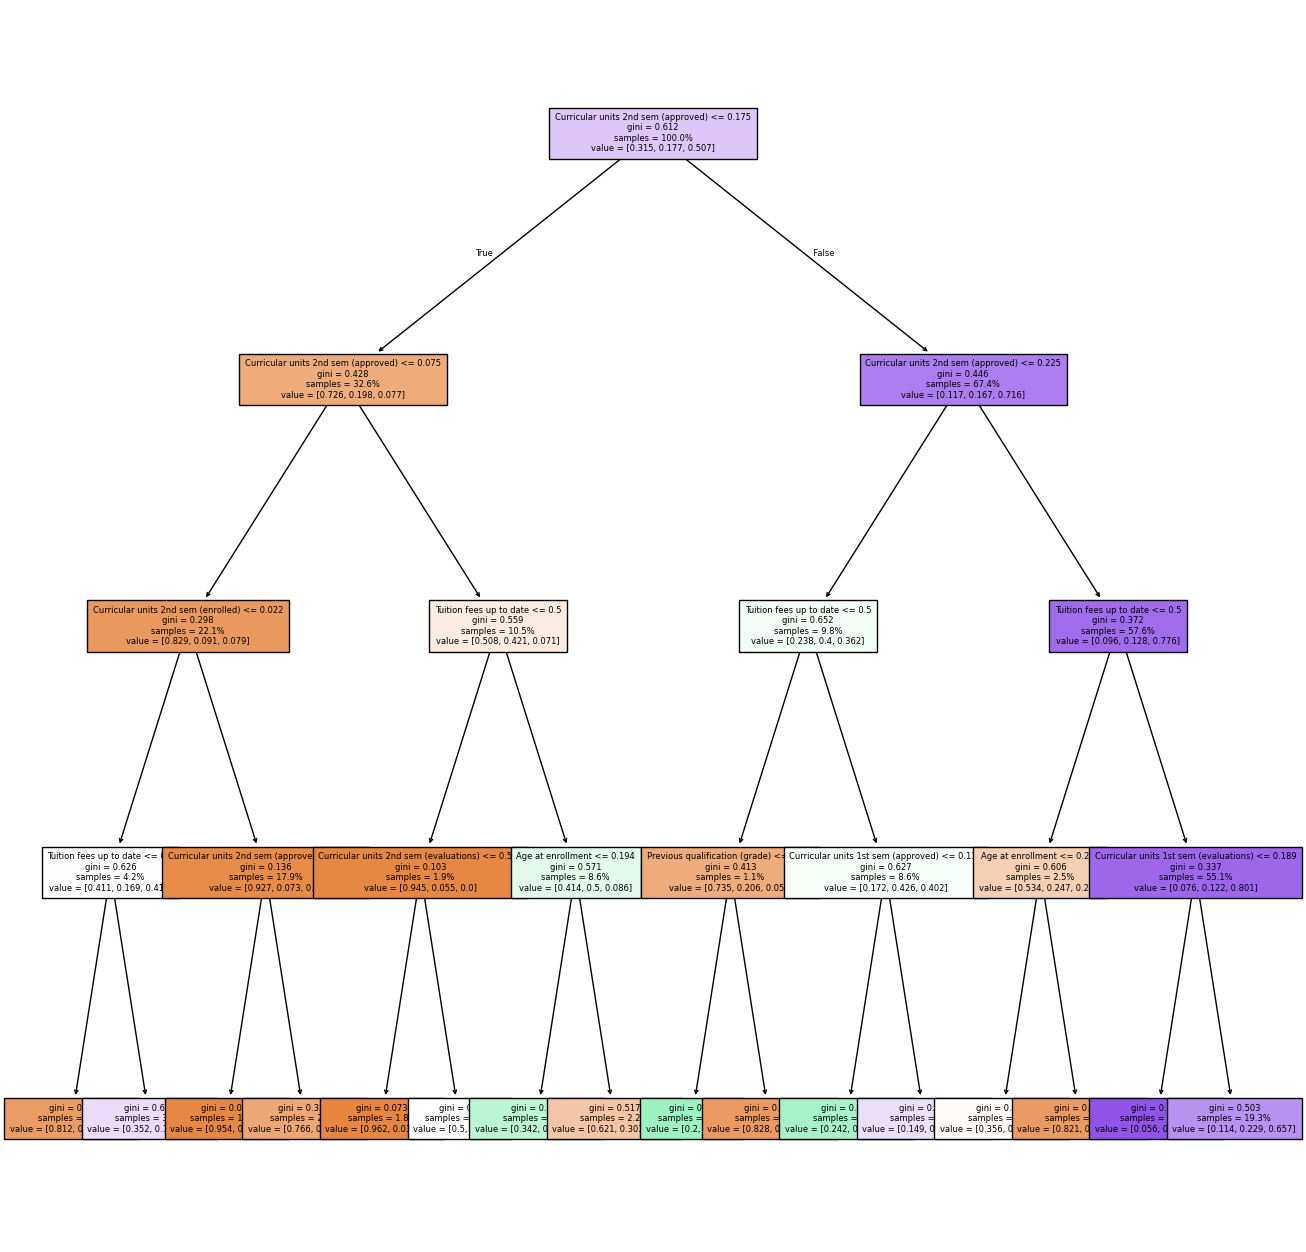

In [56]:
from sklearn import tree

model_dt = DecisionTreeClassifier(criterion = "gini", max_depth = 4).fit(X_train,y_train) #number of tree leafs multiplies on 2 to the power of max_depth

plt.figure(figsize=(16,16))
tree.plot_tree(model_dt, proportion=True, fontsize = 6,filled=True, feature_names = X.columns)
plt.show()

#purple = majority class distribution

# ROC

Since the values are scaled at this point we don't get much precision on specific values for each feature, but we can see which features descriminate the most for a decision tree to make its decisions!

In [59]:
rf_model = run_model(X_train, y_train)
gb_model = run_model2(X_train, y_train)
lr_model = run_model3(X_train, y_train)
stack_model = run_model4(X_train, y_train)
dt_model = run_model5(X_train, y_train)

y_score_rf = rf_model.predict_proba(X_test)
y_score_gb = gb_model.predict_proba(X_test)
y_score_lr = lr_model.predict_proba(X_test)
y_score_stack = stack_model.predict_proba(X_test)
y_score_dt = dt_model.predict_proba(X_test)

In [60]:
from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_test.shape

(1460, 3)

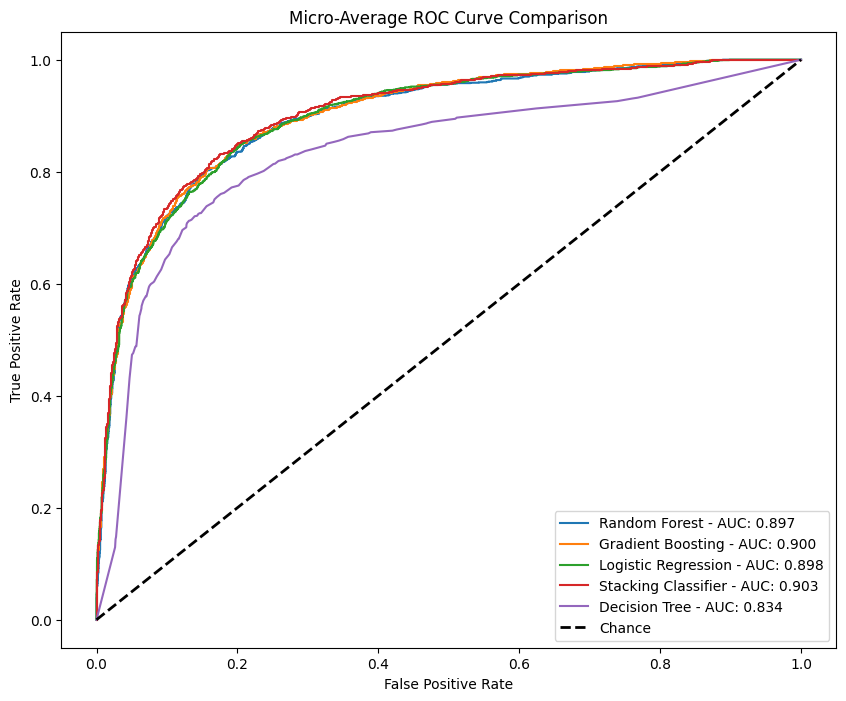

In [61]:
from sklearn.metrics import roc_curve, auc
fig, ax = plt.subplots(figsize=(10, 8))

for model, name, y_score in zip(
    [rf_model, gb_model, lr_model, stack_model, dt_model],  # Correct model objects
    ["Random Forest", "Gradient Boosting", "Logistic Regression", "Stacking Classifier", "Decision Tree"],
    [y_score_rf, y_score_gb, y_score_lr, y_score_stack, y_score_dt]  # Corresponding probabilities
):
    fpr, tpr, _ = roc_curve(y_onehot_test.ravel(), y_score.ravel())
    auc_score = auc(fpr, tpr)
    ax.plot(fpr, tpr, label=f"{name} - AUC: {auc_score:.3f}")
    
ax.plot([0, 1], [0, 1], 'k--', lw=2, label="Chance")
ax.set_title("Micro-Average ROC Curve Comparison")
ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate")
ax.legend(loc="best")
plt.show()



Most models score reasonably similar in comparison to one another, with the exception of the decision tree model which has a smaller area under the curve, making it less reliable across different scenarios.